In [1]:
from bigdl.util.common import *
from bigdl.transform.vision.image import *
import cv2
import numpy as np
from IPython.display import Image, display
init_engine()

# Create LocalImageFrame

In [2]:
from bigdl.util.common import *
from bigdl.transform.vision.image import *

# create LocalImageFrame from an image
local_image_frame = ImageFrame.read("image/test.jpg")

# create LocalImageFrame from an image folder
local_image_frame = ImageFrame.read("image/")

# create LocalImageFrame from list of images
image = cv2.imread("image/test.jpg")
local_image_frame = LocalImageFrame([image])

print local_image_frame.get_image()
print 'isDistributed: ', local_image_frame.is_distributed(), ', isLocal: ', local_image_frame.is_local()


creating: createLocalImageFrame
[array([[[  33.,   32.,   34., ...,   79.,   79.,   80.],
        [  33.,   32.,   34., ...,   78.,   79.,   82.],
        [  34.,   33.,   34., ...,   78.,   78.,   81.],
        ..., 
        [  82.,   47.,   43., ...,   42.,   42.,   42.],
        [ 102.,   58.,   46., ...,   43.,   43.,   43.],
        [ 112.,   66.,   48., ...,   41.,   41.,   42.]],

       [[  56.,   55.,   57., ...,  102.,   99.,  100.],
        [  56.,   55.,   57., ...,  100.,   99.,  102.],
        [  57.,   56.,   57., ...,  100.,   98.,  101.],
        ..., 
        [ 115.,   79.,   74., ...,   75.,   75.,   75.],
        [ 133.,   91.,   77., ...,   76.,   76.,   76.],
        [ 144.,   97.,   79., ...,   74.,   74.,   75.]],

       [[  94.,   93.,   95., ...,  118.,  117.,  118.],
        [  94.,   93.,   95., ...,  118.,  117.,  120.],
        [  95.,   94.,   95., ...,  118.,  116.,  119.],
        ..., 
        [ 131.,   98.,   97., ...,  108.,  108.,  108.],
        [

# Create DistributedImageFrame

In [3]:
from bigdl.util.common import *
from bigdl.transform.vision.image import *

sparkConf = create_spark_conf().setMaster("local[2]").setAppName("test image")
sc = get_spark_context(sparkConf)
init_engine()

# create DistributedImageFrame from an image
distributed_image_frame = ImageFrame.read("image/test.jpg", sc, 2)

# create DistributedImageFrame from an image folder
distributed_image_frame = ImageFrame.read("image/", sc, 2)

# create LocalImageFrame from image rdd
image = cv2.imread("image/test.jpg")
image_rdd = sc.parallelize([image], 2)
label_rdd = sc.parallelize([np.array([1.0])], 2)
distributed_image_frame = DistributedImageFrame(image_rdd, label_rdd)

images_rdd = distributed_image_frame.get_image()
label_rdd = distributed_image_frame.get_label()
print images_rdd
print label_rdd
print 'isDistributed: ', distributed_image_frame.is_distributed(), ', isLocal: ', distributed_image_frame.is_local()
print 'total images:', images_rdd.count()

creating: createDistributedImageFrame
PythonRDD[20] at RDD at PythonRDD.scala:48
PythonRDD[21] at RDD at PythonRDD.scala:48
isDistributed:  True , isLocal:  False
total images: 1


In [4]:
path = 'image/test.jpg'
    
def transform_display(transformer, image_frame):
    out = transformer(image_frame)
    cv2.imwrite('/tmp/tmp.jpg', out.get_image(to_chw=False)[0])
    display(Image(filename='/tmp/tmp.jpg'))

creating: createBrightness


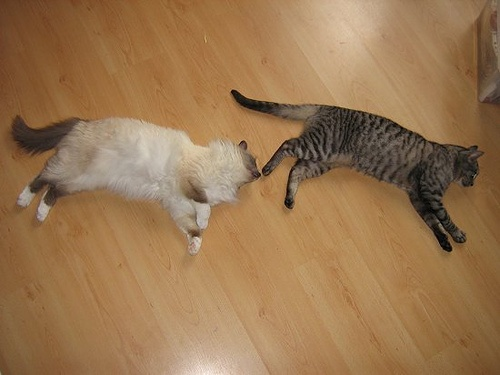

In [5]:
from bigdl.transform.vision.image import *
brightness = Brightness(0.0, 32.0)
image_frame = ImageFrame.read(path)
transform_display(brightness, image_frame)

creating: createHue


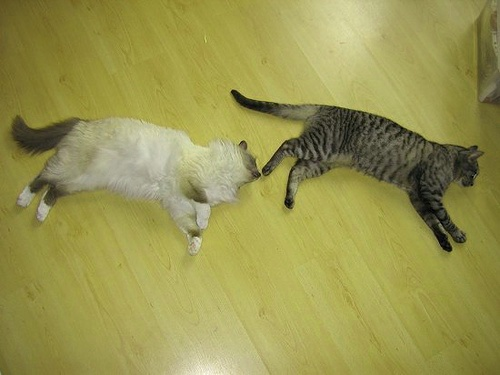

In [6]:
from bigdl.transform.vision.image import *
transformer = Hue(-18.0, 18.0)
image_frame = ImageFrame.read(path)
transform_display(transformer, image_frame)

creating: createSaturation


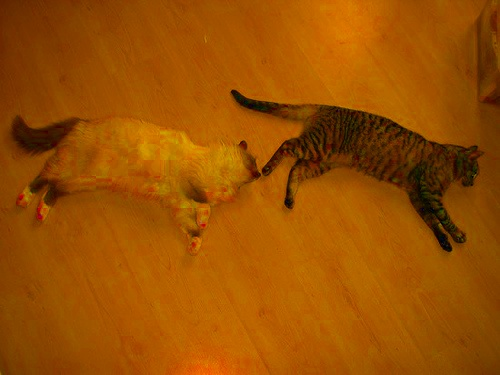

In [7]:
from bigdl.transform.vision.image import *
transformer = Saturation(10.0, 20.0)
image_frame = ImageFrame.read(path)
transform_display(transformer, image_frame)

creating: createChannelOrder


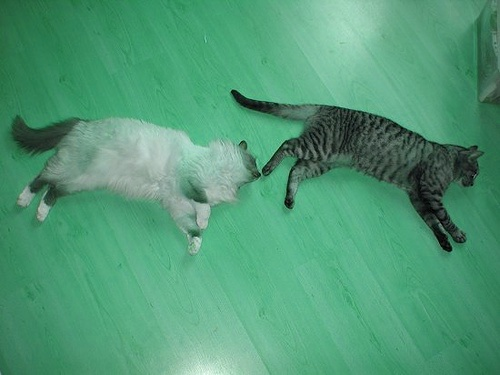

In [8]:
from bigdl.transform.vision.image import *
transformer = ChannelOrder()
image_frame = ImageFrame.read(path)
transform_display(transformer, image_frame)

creating: createColorJitter


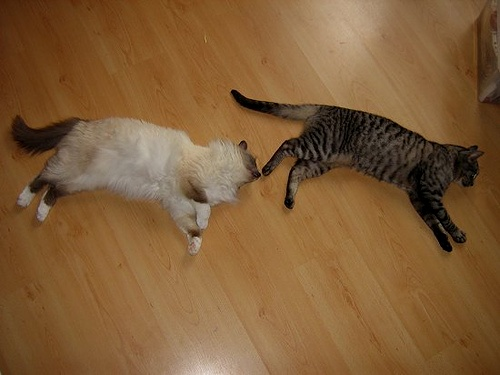

In [9]:
from bigdl.transform.vision.image import *
transformer = ColorJitter()
image_frame = ImageFrame.read(path)
transform_display(transformer, image_frame)

creating: createResize


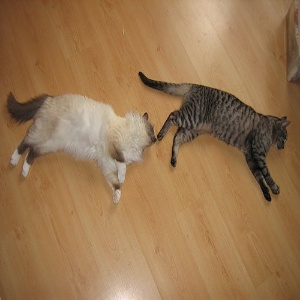

In [10]:
from bigdl.transform.vision.image import *
transformer = Resize(300, 300)
image_frame = ImageFrame.read(path)
transform_display(transformer, image_frame)

creating: createAspectScale


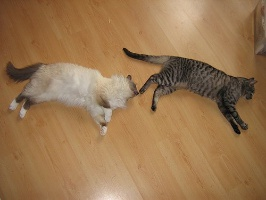

In [11]:
from bigdl.transform.vision.image import *
transformer = AspectScale(200, max_size = 3000)
image_frame = ImageFrame.read(path)
transform_display(transformer, image_frame)

creating: createRandomAspectScale


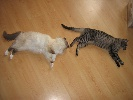

In [12]:
from bigdl.transform.vision.image import *
transformer = RandomAspectScale([100, 300], max_size = 3000)
image_frame = ImageFrame.read(path)
transform_display(transformer, image_frame)

creating: createChannelNormalize


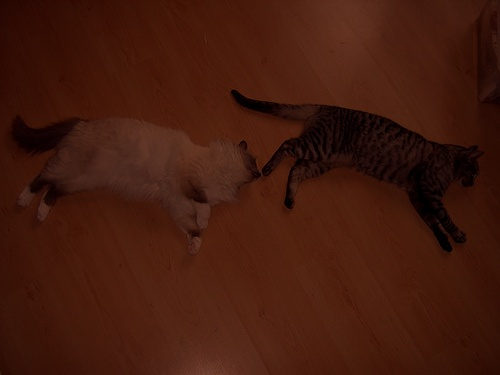

In [13]:
from bigdl.transform.vision.image import *
transformer = ChannelNormalize(20.0, 30.0, 40.0, 2.0, 3.0, 4.0)
image_frame = ImageFrame.read(path)
transform_display(transformer, image_frame)

creating: createPixelNormalize


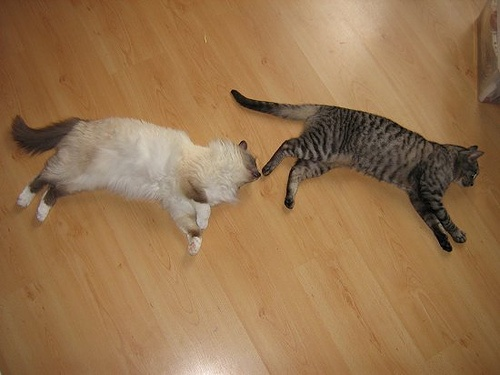

In [14]:
from bigdl.transform.vision.image import *
means = [2.0] * 3 * 500 * 375
transformer = PixelNormalize(means)
image_frame = ImageFrame.read(path)
transform_display(transformer, image_frame)

creating: createCenterCrop


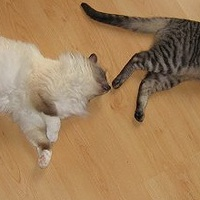

In [15]:
from bigdl.transform.vision.image import *
transformer = CenterCrop(200, 200)
image_frame = ImageFrame.read(path)
transform_display(transformer, image_frame)

creating: createRandomCrop


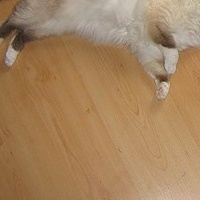

In [16]:
from bigdl.transform.vision.image import *
transformer = RandomCrop(200, 200)
image_frame = ImageFrame.read(path)
transform_display(transformer, image_frame)

creating: createFixedCrop


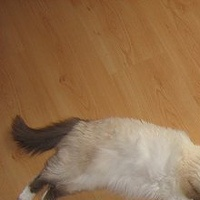

In [17]:
from bigdl.transform.vision.image import *

transformer = FixedCrop(0.0, 0.0, 200.0, 200.0, False)
image_frame = ImageFrame.read(path)
transform_display(transformer, image_frame)

creating: createFiller


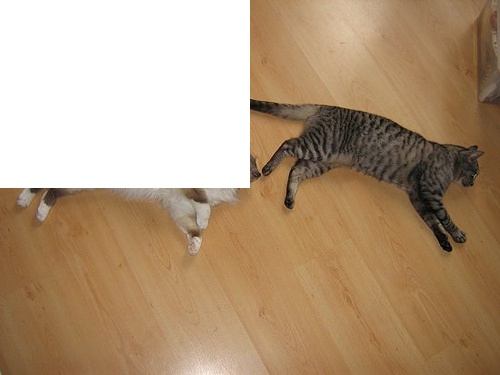

In [18]:
from bigdl.transform.vision.image import *
transformer = Filler(0.0, 0.0, 0.5, 0.5, 255)
image_frame = ImageFrame.read(path)
transform_display(transformer, image_frame)

creating: createExpand


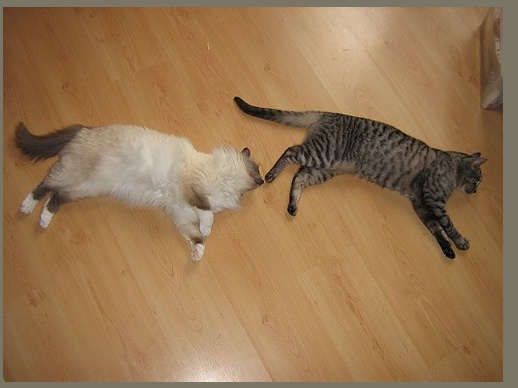

In [19]:
from bigdl.transform.vision.image import *

transformer = Expand(means_r=123, means_g=117, means_b=104,
                        max_expand_ratio=2.0)
image_frame = ImageFrame.read(path)
transform_display(transformer, image_frame)

creating: createHFlip


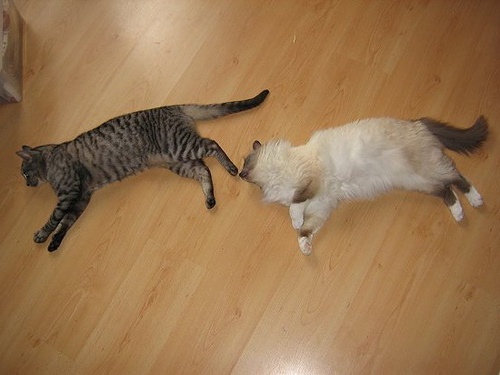

In [20]:
from bigdl.transform.vision.image import *
transformer = HFlip()
image_frame = ImageFrame.read(path)
transform_display(transformer, image_frame)

creating: createHFlip
creating: createRandomTransformer


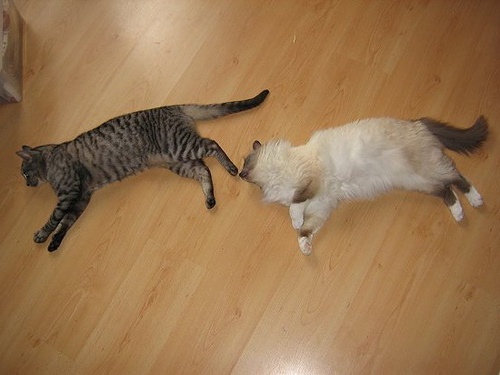

In [21]:
from bigdl.transform.vision.image import *
transformer = RandomTransformer(HFlip(), 0.5)
image_frame = ImageFrame.read(path)
transform_display(transformer, image_frame)

creating: createBytesToMat
creating: createColorJitter
creating: createExpand
creating: createResize
creating: createHFlip
creating: createPipeline


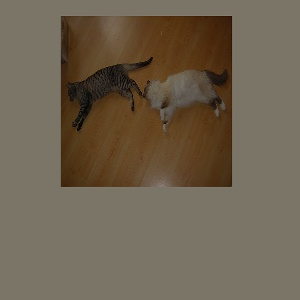

In [22]:
transformer = Pipeline([BytesToMat(),
      ColorJitter(),
      Expand(max_expand_ratio=2.0),
      Resize(300, 300, -1),
      HFlip()])
image_frame = ImageFrame.read(path)
transform_display(transformer, image_frame)